In [24]:
from __future__ import annotations
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    import pandas as pd  # for static type checkers / IntelliSense only

# Python
def plot_train_eda(df: pd.DataFrame, features=None, hue='class', figsize=(8,6), save_prefix=None):
    """
    Quick EDA plots for a training dataframe.
    - df: pandas.DataFrame
    - features: list of two (or more) feature names; defaults to common columns
    - hue: column name for class/label
    - save_prefix: if given, will save each figure with this prefix
    """
    import seaborn as sns
    import matplotlib.pyplot as plt

    if features is None:
        features = ['total.sulfur.dioxide', 'citric.acid']
    df = df.copy()

    sns.set(style='whitegrid')

    # 1) Scatter of two features (best for quick class separation)
    if len(features) >= 2:
        plt.figure(figsize=figsize)
        sns.scatterplot(data=df, x=features[0], y=features[1], hue=hue, style=hue, s=80, palette='deep')
        plt.title(f'Scatter: {features[0]} vs {features[1]} by {hue}')
        if save_prefix: plt.savefig(f'{save_prefix}_scatter.png', dpi=150, bbox_inches='tight')
        plt.show()

    # 2) Pairplot (pairwise relationships + diagonal distributions)
    cols = [c for c in features if c in df.columns] + ([hue] if hue in df.columns else [])
    if len(cols) >= 2:
        sns.pairplot(df[cols], hue=hue if hue in df.columns else None, diag_kind='hist', corner=False, height=2.5)
        if save_prefix: plt.savefig(f'{save_prefix}_pairplot.png', dpi=150, bbox_inches='tight')
        plt.show()

    # 3) Histograms of features
    df[features].hist(bins=12, figsize=(len(features)*3, 3))
    if save_prefix: plt.savefig(f'{save_prefix}_hist.png', dpi=150, bbox_inches='tight')
    plt.show()

    # 4) Boxplots by class
    n = len(features)
    fig, axs = plt.subplots(1, n, figsize=(3*n, 4), squeeze=False)
    for i, f in enumerate(features):
        sns.boxplot(x=hue, y=f, data=df, ax=axs[0, i])
        axs[0, i].set_title(f'Boxplot of {f} by {hue}')
    if save_prefix: plt.savefig(f'{save_prefix}_boxplots.png', dpi=150, bbox_inches='tight')
    plt.show()

    # 5) Correlation heatmap
    corr = df[features].corr()
    plt.figure(figsize=(4,4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Feature correlation')
    if save_prefix: plt.savefig(f'{save_prefix}_corr.png', dpi=150, bbox_inches='tight')
    plt.show()

In [25]:
def compare_knn_k(train_df, test_df, k_values=(1,3,5,7), features=None, show_plot=True, display_confusion=False):
    """
    Compare KNN performance for multiple k values.
    Args:
      train_df, test_df: pandas.DataFrame (must contain 'class' and feature columns)
      k_values: iterable of int
      features: list of feature names (defaults to ['total.sulfur.dioxide','citric.acid'])
      show_plot: whether to plot accuracy vs k
      display_confusion: if True, show a confusion matrix for each k
    Returns:
      dict mapping k -> {model, y_pred, y_true, confusion_matrix, accuracy, report}
    """
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
    import matplotlib.pyplot as plt
    import numpy as np

    if features is None:
        features = ['total.sulfur.dioxide', 'citric.acid']

    X_train = train_df[features]
    y_train = train_df['class']
    X_test = test_df[features]
    y_test = test_df['class'].values

    results = {}
    k_values = list(k_values)
    accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        results[k] = {
            "model": knn,
            "y_pred": y_pred,
            "y_true": y_test,
            "confusion_matrix": cm,
            "accuracy": acc,
            "report": report
        }

        accuracies.append(acc)
        print(f"k={k}  accuracy={acc:.3f}")
        if display_confusion:
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
            disp.plot(cmap='Blues')
            plt.title(f"Confusion Matrix (k={k})")
            plt.show()

    if show_plot:
        plt.figure(figsize=(6,4))
        plt.plot(k_values, accuracies, marker='o', linestyle='-')
        plt.xticks(k_values)
        plt.xlabel("k (n_neighbors)")
        plt.ylabel("Accuracy")
        plt.title("KNN accuracy vs k")
        plt.grid(True)
        plt.show()

    return results


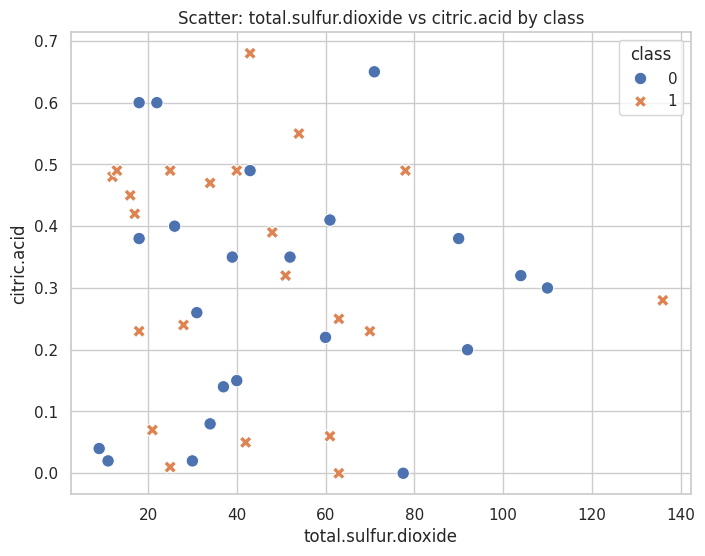

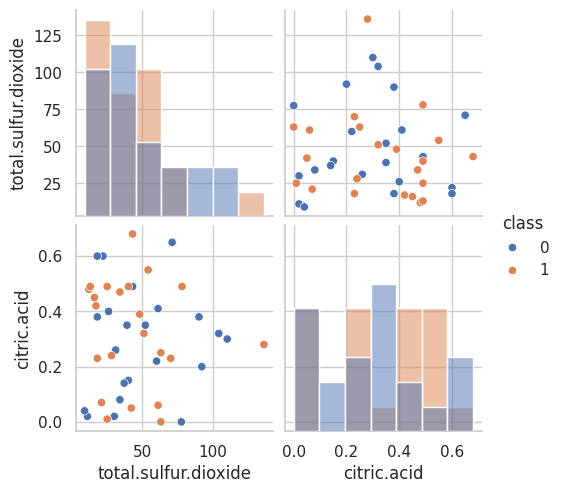

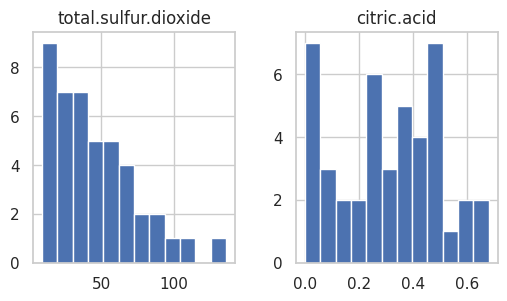

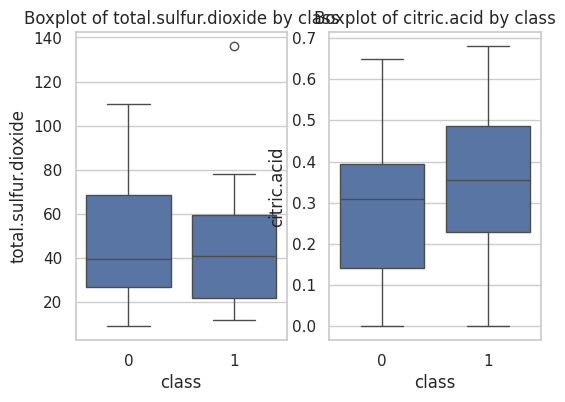

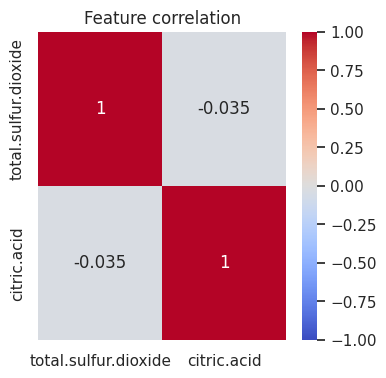

k=1  accuracy=0.750


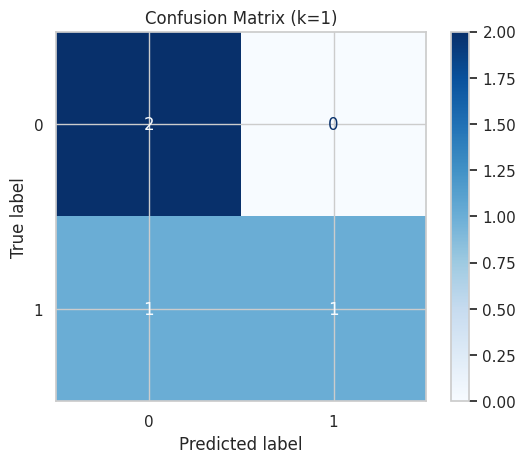

k=3  accuracy=0.500


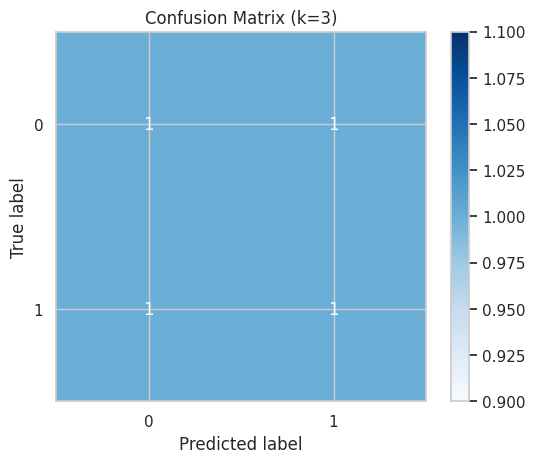

k=5  accuracy=0.250


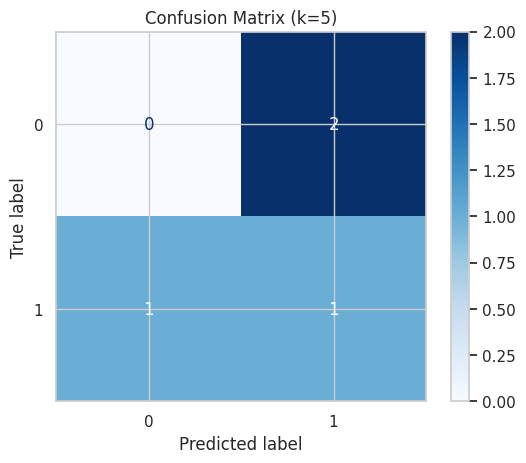

k=7  accuracy=0.250


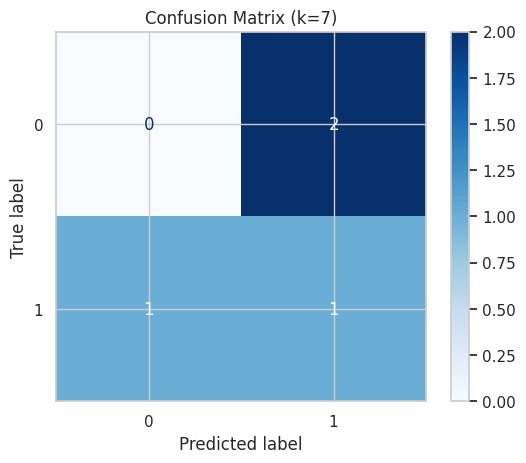

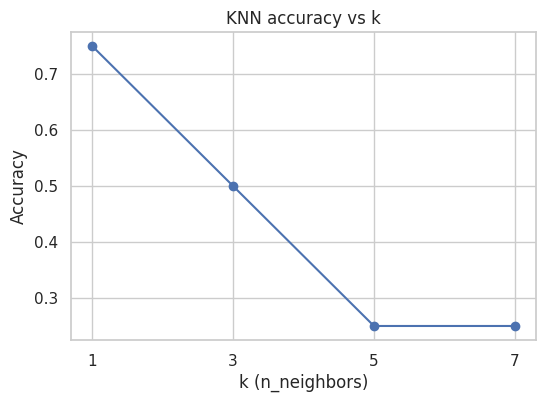

{1: {'model': KNeighborsClassifier(metric='euclidean', n_neighbors=1),
  'y_pred': array([0, 0, 1, 0]),
  'y_true': array([0, 0, 1, 1]),
  'confusion_matrix': array([[2, 0],
         [1, 1]]),
  'accuracy': 0.75,
  'report': {'0': {'precision': 0.6666666666666666,
    'recall': 1.0,
    'f1-score': 0.8,
    'support': 2.0},
   '1': {'precision': 1.0,
    'recall': 0.5,
    'f1-score': 0.6666666666666666,
    'support': 2.0},
   'accuracy': 0.75,
   'macro avg': {'precision': 0.8333333333333333,
    'recall': 0.75,
    'f1-score': 0.7333333333333334,
    'support': 4.0},
   'weighted avg': {'precision': 0.8333333333333333,
    'recall': 0.75,
    'f1-score': 0.7333333333333334,
    'support': 4.0}}},
 3: {'model': KNeighborsClassifier(metric='euclidean', n_neighbors=3),
  'y_pred': array([1, 0, 1, 0]),
  'y_true': array([0, 0, 1, 1]),
  'confusion_matrix': array([[1, 1],
         [1, 1]]),
  'accuracy': 0.5,
  'report': {'0': {'precision': 0.5,
    'recall': 0.5,
    'f1-score': 0.5,
  

In [26]:
# Load training and testing data
import pandas as pd

train_df = pd.read_csv('Dados_Originais_2Features/TrainingData_2F_Original.txt', sep='\t')
test_df = pd.read_csv('Dados_Originais_2Features/TestingData_2F_Original.txt', sep='\t')

plot_train_eda(train_df, features=['total.sulfur.dioxide', 'citric.acid'], hue='class')

compare_knn_k(train_df=train_df, test_df=test_df, k_values=(1,3,5,7), features=['total.sulfur.dioxide', 'citric.acid'], show_plot=True, display_confusion=True)

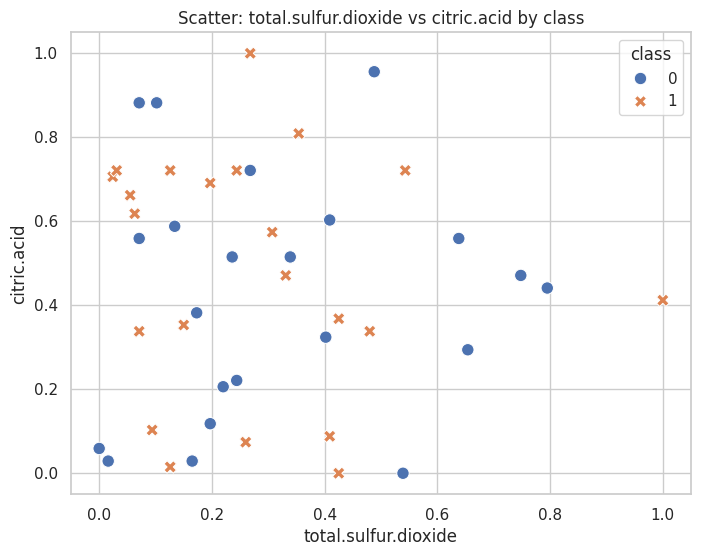

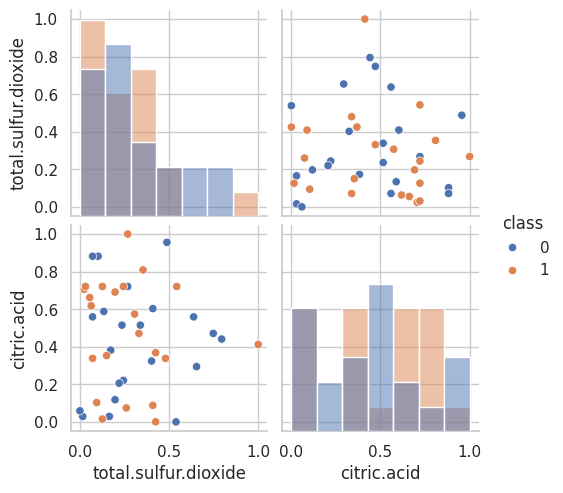

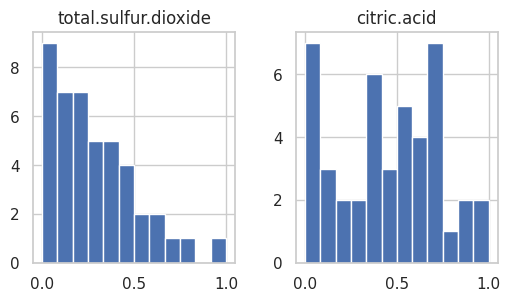

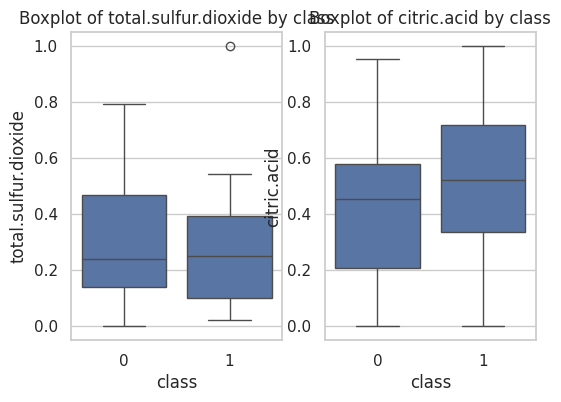

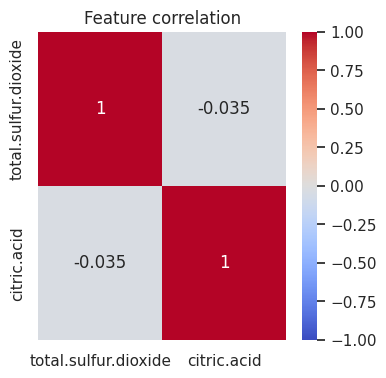

k=1  accuracy=0.500


/home/henrique/.conda/envs/ml/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/henrique/.conda/envs/ml/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/henrique/.conda/envs/ml/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

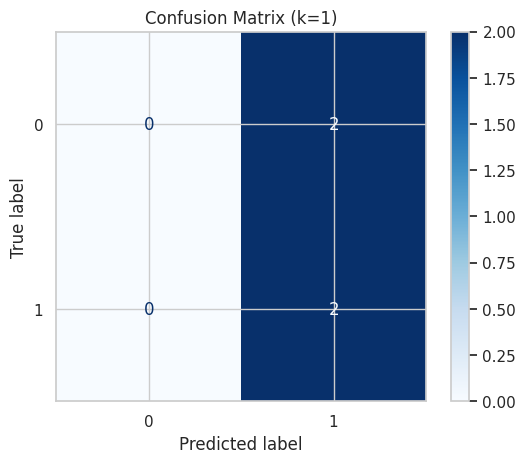

k=3  accuracy=0.250


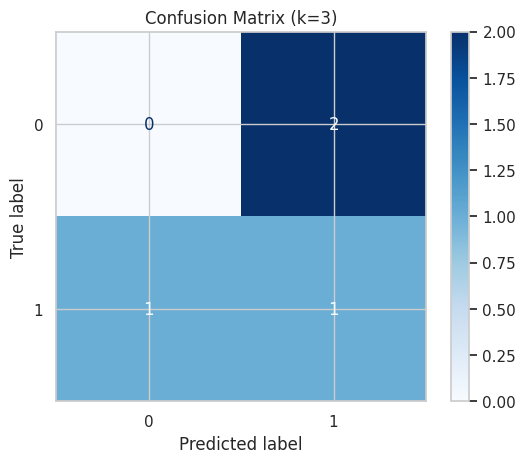

k=5  accuracy=0.750


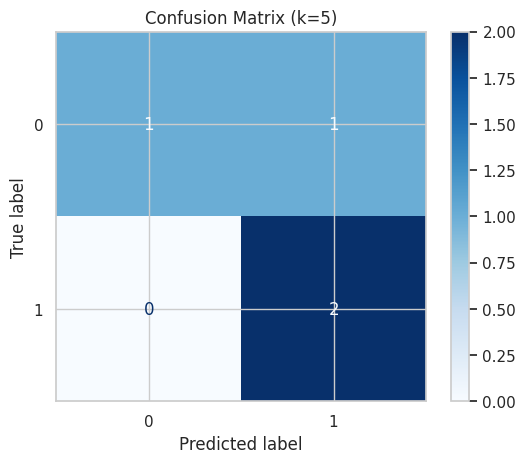

k=7  accuracy=1.000


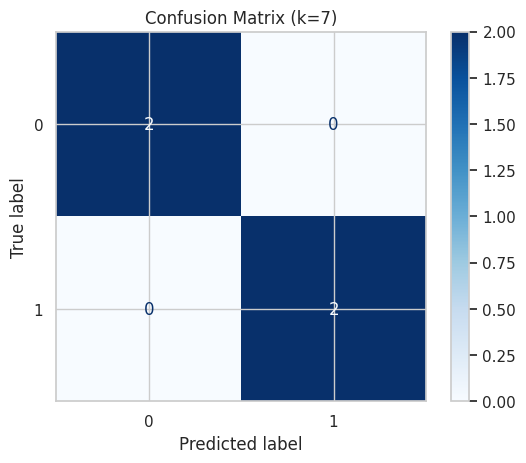

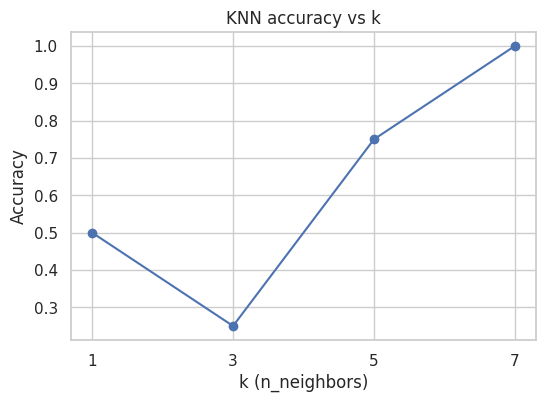

{1: {'model': KNeighborsClassifier(metric='euclidean', n_neighbors=1),
  'y_pred': array([1, 1, 1, 1]),
  'y_true': array([0, 0, 1, 1]),
  'confusion_matrix': array([[0, 2],
         [0, 2]]),
  'accuracy': 0.5,
  'report': {'0': {'precision': 0.0,
    'recall': 0.0,
    'f1-score': 0.0,
    'support': 2.0},
   '1': {'precision': 0.5,
    'recall': 1.0,
    'f1-score': 0.6666666666666666,
    'support': 2.0},
   'accuracy': 0.5,
   'macro avg': {'precision': 0.25,
    'recall': 0.5,
    'f1-score': 0.3333333333333333,
    'support': 4.0},
   'weighted avg': {'precision': 0.25,
    'recall': 0.5,
    'f1-score': 0.3333333333333333,
    'support': 4.0}}},
 3: {'model': KNeighborsClassifier(metric='euclidean', n_neighbors=3),
  'y_pred': array([1, 1, 1, 0]),
  'y_true': array([0, 0, 1, 1]),
  'confusion_matrix': array([[0, 2],
         [1, 1]]),
  'accuracy': 0.25,
  'report': {'0': {'precision': 0.0,
    'recall': 0.0,
    'f1-score': 0.0,
    'support': 2.0},
   '1': {'precision': 0.333

In [27]:
# Load training and testing data
import pandas as pd

train_df = pd.read_csv('Dados_Normalizados_2Features/TrainingData_2F_Norm.txt', sep='\t')
test_df = pd.read_csv('Dados_Normalizados_2Features/TestingData_2F_Norm.txt', sep='\t')

plot_train_eda(train_df, features=['total.sulfur.dioxide', 'citric.acid'], hue='class')

compare_knn_k(train_df=train_df, test_df=test_df, k_values=(1,3,5,7), features=['total.sulfur.dioxide', 'citric.acid'], show_plot=True, display_confusion=True)